# Explanation for Part 2
Conjugate Gradient:
For this exercise we consider a tridiagonal  , symmetric matrix like A which has $1000 \times 1000$ dimensions and on the diagonal , the matrix has  1,2,3,…,1000 and 1 on the sub and super diagonals and we assume that $b=(1,1,…,1)^{T}$ So we should write a code that performs 1000 steps of steepest descent iteration and also Conjugate Gradient iteration method for solving (approximately) Ax=b. 
so the procedure of these 2 iteration methods are written as the python code as following:
Then we should plot 4 graphs : 
1) The computed residual norms for Conjugate Gradient Method
2) The actual residual norms for Conjugate Gradient Method
3) The residual norms for Steepest descent
And the last one
4) estimate of $2(\sqrt{k}-1)^{i}/(\sqrt{k}+1)^{i}$ And $k$ the condition number of Matrix A.


# Some comparisons from some papers( Conjugate Gradient and Steepest Descent Methods):

“Conjugate Gradient for Linear Systems) “by Robert Bridson:

Our first observation is that clearly CG will always outperform Steepest Descent: CG is optimizing over a larger set of directions. A somewhat arduous analysis can show that whereas Steepest Descent needs $O(κ(A))$ iterations in the worst case, CG only needs $O(κ(A)^\frac{1}{2})$ iterations, an order of magnitude better.

In exact arithmetic, CG isn’t necessarily an iterative solver: after n steps, it will return the best guess in the entire space, which must of course be the exact solution. In fact, CG was originally proposed as an alternative to Gaussian Elimination— but was initially discarded when it became clear that it took a constant factor more operations. In reality, with the presence of round-off perturbing the calculation, CG isn’t exact, but will often get the solution to high precision long before the n’th iteration.
As it turns out, CG actually converges superlinearly: the speed at which it converges increases as you iterate more.

“Conjugate Gradient Versus Steepest Descent” by J. C. ALLWRIGHT:

It is known that the conjugate-gradient algorithm is at least as good as the steepest-descent algorithm for minimizing quadratic functions. It is shown here that the conjugate-gradient algorithm is actually superior to the steepest-descent algorithm in that, in the generic case, at each iteration it yields a lower cost than does the steepest descent algorithm, when both start at the same point.

# This is what I figured out after studying these papers and also after getting the result on the graph:

The starting point for both methods is the same (it’s clear) and because the horizontal axis shows the iteration and the vertical shows the logarithmic scale we can observe from 2 graphs (blue and red) which are related to CG and SD respectively, when it starts to iterate after less than 50 steps both graphs shows a different behavior, for instance the Conjugate Gradient Method decreases at first and then a little bit increases and right after that rapidly decreases with a large(sharp) slope from approximately $10^{-14}$  to $10^{-73}$ . 

on the other hand the residual of Steepest descent method has the decreasing behavior but the slop or in other word the speed of convergence is very slow in comparison with Conjugate Gradient Method and at the 1000th step we can see that the residual of conjugate gradient is approximately $10^{-73}$ but for Steepest descent is between 10 and $10^{-2}$ . this is clearly stating that Conjugate Gradient Method is superior.


Another important point that I see from the graph is that from the first (initial) step $(i= 0)$ until (to) $250<i=280<300$, both graphs (actual and computed residual) has coincidence (are coincident) but instantly after that iteration, the actual norms continuous as a constant line parallel to horizontal axis until the 1000th (last) step. So this confirms again that steepest descent is converging  slower on the other hand the conjugate gradient is acting more accurate and is converging to zero faster. 

And also the exercise asked us to compute $2(\sqrt{k}-1)^{i}/(\sqrt{k}+1)^{i}$ which $“i”$ is the iteration and $“k”$ is the condition number of the matrix A. I guess that this acts like a lower bound for computed steepest descent and the SD graph converges to this line and goes closer to this line but immediately ran away from this line.

To write the behavior of CG  more accurate and scientific by a paper that I read and its title is “On the Behavior of the Residuals in Conjugate Gradient Method , Teruyoshi Washizawa” :”In practice,
the residual is calculated by the recursion formula because of the computational
complexity of the matrix vector product $Ax_{k}$ .

However, this computed (recursive) formula causes another problem in which the computed (recursive) residual differs from the
actual (true) residual as the iteration proceeds. It can be also observed that the computed
residual decreases after the actual one seems to reach its lower bound.”

So as this paper confirms this behavior, we can summarize the conclusion and observations here that : from approximately $250<i<300$ the actual residual reaches its lower bound which is approximately close to  $10^{-14}$ and stays constant at this number until the last iteration, on the other hand, the computed residual norm is almost monotonically decreasing and fluctuating all the time .

It is worth to look at some conclusions on this paper:
In this article, the convergence behaviors of true and recursive residual have
been analyzed. The results obtained are summarized below:
• In finite arithmetic, the 2-norm of the error and the residual, respectively,
almost monotonically decreases.
• 2-norm of the error has the lower bound in finite arithmetic as well as the
true residual.
• 2-norm of the computed (recursive) residual never have a non-zero lower bound caused
by the loss of trailing digits in finite arithmetic.


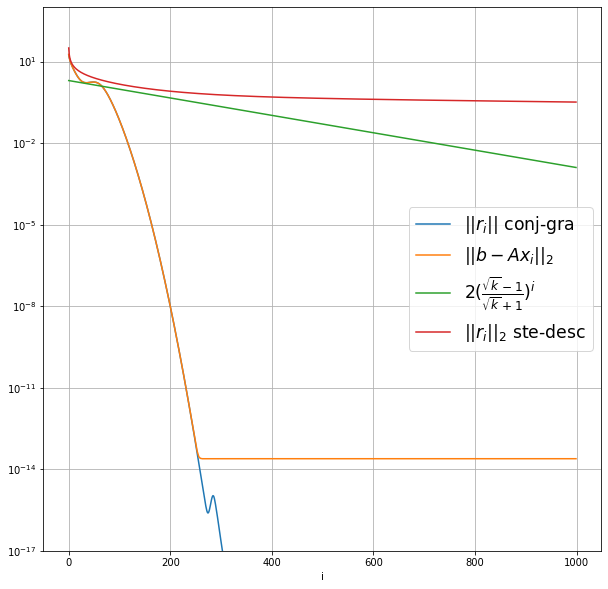

In [35]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

#STEEPEST DESCENT METHOD
k=1000 #length of matrix
a = np.zeros((k,k)) #defining A matrix
for i in range(k-1):
    a[i][i] = i+1
    a[i][i+1] = 1
    a[i+1][i] = 1

a[k-1][k-1]= k
b = k*[1]      #defining b matrix
x = k*[0]      #initial solution
kk = LA.norm(a)*LA.norm(LA.inv(a)) #condition number of A matrix 
z= range(k)
norm_sd=[] # list for saving norm
phi=[]     # list for saving condition number
for i in z:
    r=b- np.matmul(a,x)
    norm_sd.append(LA.norm(r))
    alpha = np.dot(r,r)/np.dot(r,np.matmul(a,r))
    x = x + np.dot(alpha,r)
    phi.append(2*((np.sqrt(kk)-1)/(np.sqrt(kk)+1))**i)

#CONJUGATE GRADIENT METHOD
k=1000 #length of matrix
a = np.zeros((k,k)) #defining A matrix
for i in range(k-1):
    a[i][i] = i+1
    a[i][i+1] = 1
    a[i+1][i] = 1

a[k-1][k-1]= k
b = k*[1]      #defining b matrix
x = k*[0]      #initial solution

z= range(k)
norm_cg=[] # list for saving norm
norm_r=[]     # list for saving condition number

#first step i=1
beta = 0
rold = b
d = b
alpha = np.dot(rold,rold)/np.dot(d,np.matmul(a,d))
x = x + np.dot(alpha,d)
r = rold - np.dot(alpha,np.matmul(a,d))
norm_cg.append(LA.norm(r))
norm_r.append(LA.norm(b-np.matmul(a,x)))


for i in range(1,k):
    beta = np.dot(r,r)/np.dot(rold,rold)
    d = r + np.dot(beta,d)
    alpha = np.dot(r,r)/np.dot(d,np.matmul(a,d))
    x = x + np.dot(alpha,d)
    rold = r
    r = r - np.dot(alpha,np.matmul(a,d)) 
    norm_cg.append(LA.norm(r))
    norm_r.append(LA.norm(b-np.matmul(a,x)))

#plot  
plt.figure(figsize =[10,10])
plt.plot(z, norm_cg, label= "$||r_i||$ conj-gra")
plt.plot(z, norm_r, label = '$|| b-Ax_i||_2$')
plt.plot(z, phi, label= "$2(\\frac{\sqrt{k}-1}{\sqrt{k}+1})^i$")
plt.plot(z, norm_sd, label = '$|| r_i||_2$ ste-desc')
plt.yscale("log")
plt.ylim(10**(-17),10**3)
plt.xlabel("i")
plt.grid()
plt.legend(fontsize='xx-large')
plt.show()